In [1]:
from typing import List
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
DATA_DIR = Path('../data').resolve()
assert DATA_DIR.exists()

In [3]:
df = pd.read_excel(DATA_DIR / 'base_indices_2005-2023.xlsx', sheet_name='BaseINDICES_2005_2023')

In [4]:
def calcular_matriculas_por_año(
    df: pd.DataFrame, columna_matricula: str | List[str] 
) -> pd.Series:
    """Calcula la cantidad de matriculas por año."""
    return df.groupby("Año")[columna_matricula].sum()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218773 entries, 0 to 218772
Data columns (total 60 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Año                                                 218773 non-null  int64  
 1   Cód. Institución                                    218773 non-null  int64  
 2   Nombre Institución                                  218773 non-null  object 
 3   Tipo Institución                                    218773 non-null  object 
 4   Clasificación1                                      218773 non-null  object 
 5   Clasificación2                                      218773 non-null  object 
 6   Clasificación3                                      218773 non-null  object 
 7   Clasificación4                                      218773 non-null  object 
 8   Clasificación5                                      218773 non-n

In [6]:
df.describe()

,Año,Cód. Institución,Orden Geográfico de la Región (Norte aSur),Cód. Carrera,idgenerocarrera,Año Inicio Actividades,Duración (en semestres),Cód. Campus,Cód. Sede,Máximo Puntaje (promedio matemáticas y lenguaje),...,Valor del Título,Vacantes,Matrícula primer año hombres,Matrícula primer año mujeres,Matrícula primer año extranjeros,Matrícula Primer Año,Matrícula total hombres,Matrícula total mujeres,Matrícula total extranjeros,Matrícula Total
count,218773.000000,218773.000000,218773.000000,218773.000000,2.187730e+05,218773.000000,218047.000000,1.035250e+05,2.187730e+05,40018.000000,...,1.820020e+05,1.603610e+05,197991.000000,197741.000000,157630.000000,218773.000000,215556.000000,215164.000000,166431.000000,218773.000000
mean,2014.907150,1671.081198,7.793297,18328.475397,8.562085e+05,2005.765213,6.490738,1.431034e+09,1.671086e+06,652.792069,...,1.614738e+05,4.473227e+02,15.603937,16.475824,0.584223,29.013567,45.751842,49.029275,1.548221,93.299534
std,5.207307,758.769099,2.942522,13057.761699,3.456971e+05,12.436666,2.599009,6.394409e+08,7.587712e+05,87.250824,...,2.391593e+05,6.596259e+04,25.240674,26.284474,2.254553,41.611269,86.541233,86.335418,6.703305,148.857924
min,2005.000000,1001.000000,1.000000,1000.000000,1.060100e+04,1833.000000,1.000000,0.000000e+00,1.001001e+06,266.000000,...,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011.000000,1028.000000,7.000000,7414.000000,1.004002e+06,2003.000000,4.000000,1.020001e+09,1.028001e+06,599.000000,...,1.700000e+03,2.200000e+01,1.000000,1.000000,0.000000,1.000000,6.000000,5.000000,0.000000,17.000000
50%,2015.000000,1054.000000,7.000000,15808.000000,1.008010e+06,2008.000000,6.000000,1.040001e+09,1.054001e+06,652.000000,...,8.600000e+04,3.000000e+01,8.000000,8.000000,0.000000,19.000000,19.000000,18.000000,0.000000,46.000000
75%,2019.000000,2029.000000,10.000000,28045.000000,1.009010e+06,2013.000000,8.000000,2.012004e+09,2.029007e+06,706.000000,...,2.100000e+05,5.000000e+01,20.000000,22.000000,0.000000,40.000000,52.000000,56.000000,1.000000,111.000000
max,2023.000000,4063.000000,16.000000,51341.000000,2.030005e+06,2023.000000,15.000000,4.045001e+09,4.063001e+06,1000.000000,...,7.198000e+06,1.078400e+07,860.000000,1203.000000,252.000000,1954.000000,4221.000000,2745.000000,967.000000,6048.000000


In [23]:
for col in df.columns:
    print(f"Columna: {col} - Valores únicos: {df[col].nunique()} - Porcentaje de nulos: {df[col].isnull().sum() / len(df) * 100:.2f}%")

Columna: Año - Valores únicos: 19 - Porcentaje de nulos: 0.00%
Columna: Cód. Institución - Valores únicos: 247 - Porcentaje de nulos: 0.00%
Columna: Nombre Institución - Valores únicos: 247 - Porcentaje de nulos: 0.00%
Columna: Tipo Institución - Valores únicos: 4 - Porcentaje de nulos: 0.00%
Columna: Clasificación1 - Valores únicos: 6 - Porcentaje de nulos: 0.00%
Columna: Clasificación2 - Valores únicos: 8 - Porcentaje de nulos: 0.00%
Columna: Clasificación3 - Valores únicos: 2 - Porcentaje de nulos: 0.00%
Columna: Clasificación4 - Valores únicos: 6 - Porcentaje de nulos: 0.00%
Columna: Clasificación5 - Valores únicos: 2 - Porcentaje de nulos: 0.00%
Columna: Clasificación6 - Valores únicos: 4 - Porcentaje de nulos: 0.00%
Columna: Nombre de la Sede - Valores únicos: 117 - Porcentaje de nulos: 0.00%
Columna: Comuna donde se imparte la carrera o programa - Valores únicos: 127 - Porcentaje de nulos: 0.00%
Columna: Nombre Region - Valores únicos: 16 - Porcentaje de nulos: 0.00%
Columna: Or

In [7]:
# Cast te año a datetime
df['Año'] = pd.to_datetime(df['Año'], format='%Y')

## Distribuciones importantes

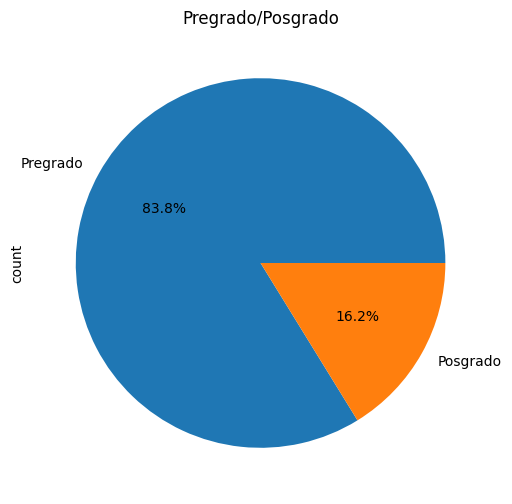

In [8]:
df['Pregrado/Posgrado'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Pregrado/Posgrado');

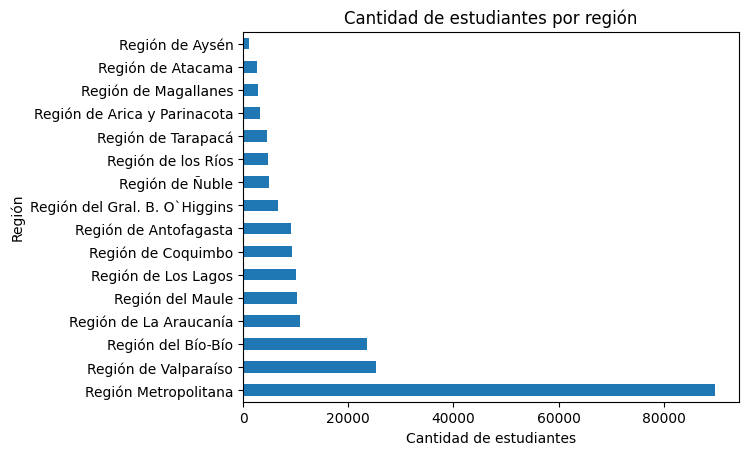

In [20]:
df['Nombre Region'].value_counts().plot(kind='barh')
plt.ylabel('Región')
plt.xlabel('Cantidad de estudiantes')
plt.title('Cantidad de estudiantes por región');

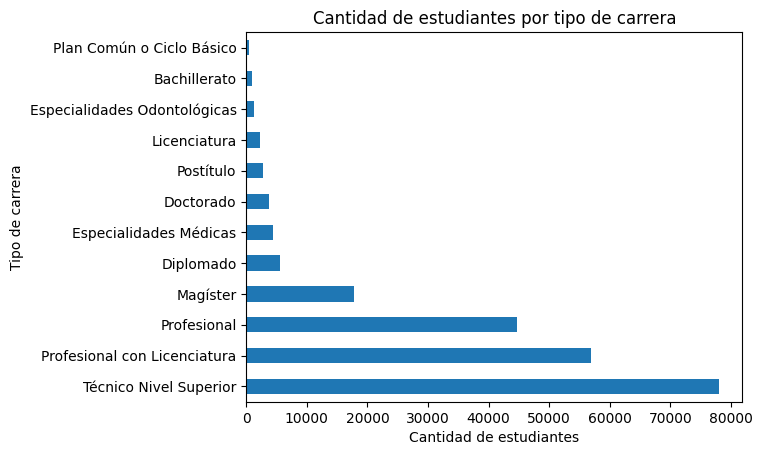

In [21]:
df['Tipo Carrera'].value_counts().plot(kind='barh')
plt.ylabel('Tipo de carrera')
plt.xlabel('Cantidad de estudiantes')
plt.title('Cantidad de estudiantes por tipo de carrera');

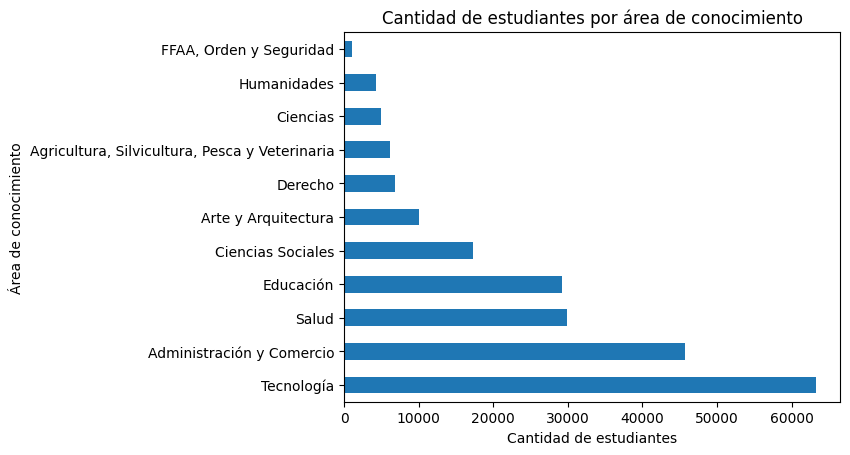

In [22]:
df['Area Conocimiento'].value_counts().plot(kind='barh')
plt.ylabel('Área de conocimiento')
plt.xlabel('Cantidad de estudiantes')
plt.title('Cantidad de estudiantes por área de conocimiento');

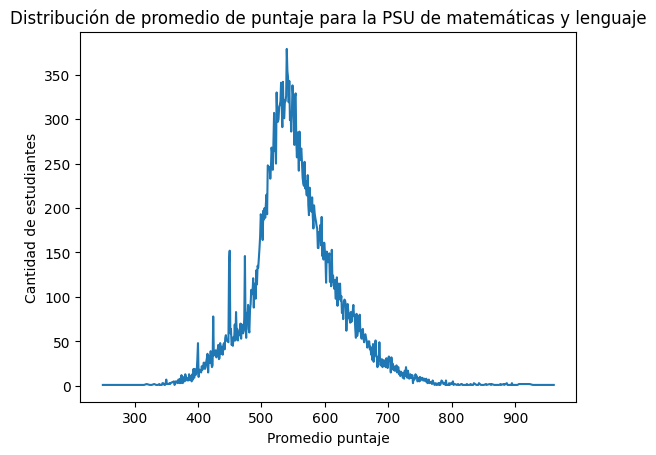

In [34]:
# TO DO, separar por año

df["Promedio Puntaje (promedio matemáticas y lenguaje)"].value_counts().sort_index().plot()
plt.xlabel("Promedio puntaje")
plt.ylabel("Cantidad de estudiantes")
plt.title("Distribución de promedio de puntaje para la PSU de matemáticas y lenguaje");

## Preguntas de interés

#### 1. Evolución de total de estudiantes año

<Axes: xlabel='Año', ylabel='Cantidad de estudiantes'>

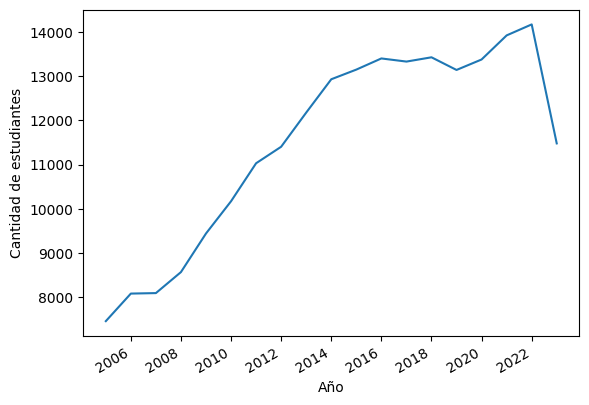

In [213]:
estudiantes_por_año = df.value_counts('Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de estudiantes')
estudiantes_por_año.plot()

#### 2. Efecto en la matrícula en educación superior (universidades) del ingreso de la gratuidad al sistema de becas

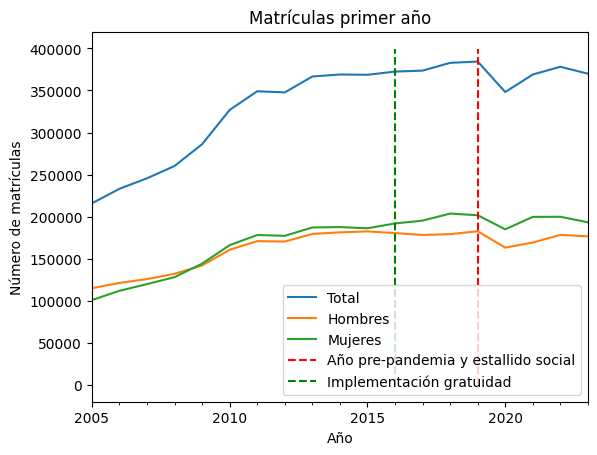

In [216]:
total_matriculas_por_año = calcular_matriculas_por_año(df, "Matrícula Primer Año")
hombres_por_año = calcular_matriculas_por_año(df, "Matrícula primer año hombres")
mujeres_por_año = calcular_matriculas_por_año(df, "Matrícula primer año mujeres")

total_matriculas_por_año.plot(label="Total")
hombres_por_año.plot(label="Hombres")
mujeres_por_año.plot(label="Mujeres")

plt.vlines(
    x="2019-01-01",
    ymin=0,
    ymax=total_matriculas_por_año.max() + 15000,
    color="red",
    linestyle="--",
    label="Año pre-pandemia y estallido social",
)
plt.vlines(
    x="2016-01-01",
    ymin=0,
    ymax=total_matriculas_por_año.max() + 15000,
    color="green",
    linestyle="--",
    label="Implementación gratuidad",
)
plt.xlabel("Año")
plt.ylabel("Número de matrículas")
plt.title("Matrículas primer año")
plt.legend();

Podemos ver que hay una clara disminución de matrículas de primer año en el año 2020, a qué se debe esto?

#### 3. Influencia beca Vocación de Profesor

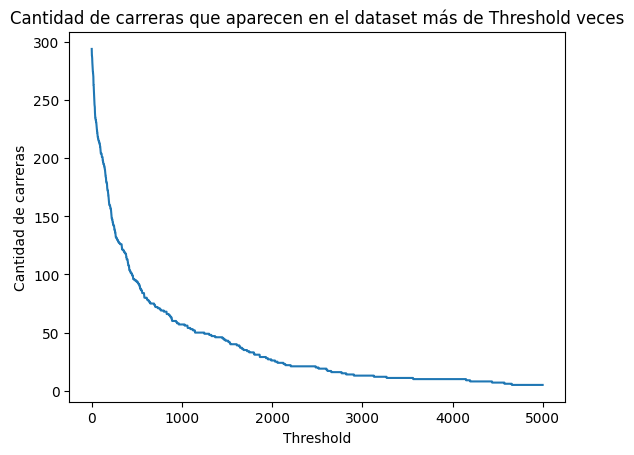

In [217]:
vc = df['Carrera Genérica'].value_counts()
max_threshold = 5000

values = [len(vc[vc > t]) for t in range(max_threshold)]  
pd.Series(values, index=range(max_threshold)).plot()

plt.ylabel('Cantidad de carreras')
plt.xlabel('Threshold')
plt.title('Cantidad de carreras que aparecen en el dataset más de Threshold veces');

In [218]:
threshold = 1000
carreras = vc[vc > threshold].index
carreras = df[df['Carrera Genérica'].isin(carreras)]
carreras['Carrera Genérica'].value_counts()

Carrera Genérica
Posgrado                                                                26753
Técnico en Administración de Empresas                                    7408
Técnico en Enfermería y Similares                                        5670
Diplomado                                                                5559
Ingeniería en Administración, Administración de Empresas y similares     5536
Ingeniería en Computación e Informática y similares                      4657
Trabajo Social, Servicio Social, Planificación Social y similares        4575
Técnico en Prevención de Riesgos                                         4438
Ingeniería en Prevención de Riesgos                                      4195
Contabilidad, Auditoría y similares                                      4150
Técnico en Educación Parvularia                                          3563
Ingeniería Comercial                                                     3269
Postítulo                                      

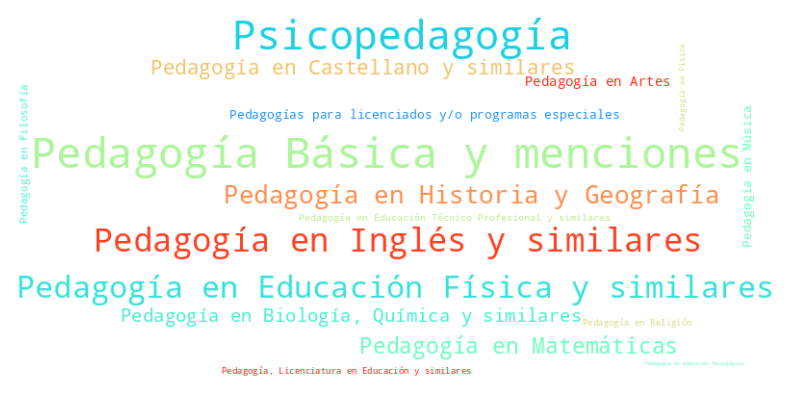

In [204]:
contains_pedagogia = (
    df["Carrera Genérica"]
    .str.lower()
    .str.normalize("NFKD")
    .str.encode("ascii", errors="ignore")
    .str.decode("utf-8")
    .str.contains("pedagogia")
)
pedagogias = df.loc[contains_pedagogia, "Carrera Genérica"].value_counts()
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="rainbow",
    prefer_horizontal=0.5,
    contour_width=2,
    contour_color="steelblue",
    random_state=42,
)
wordcloud.generate_from_frequencies(pedagogias)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

Muchas carreras tienen el nombre pedagogía, por lo que para hacer un análisis general de la influencia de la beca vocación de profesor, se agruparán las carreras que contengan la palabra pedagogía en su nombre.

In [219]:
df.loc[contains_pedagogia, "Carrera Genérica"] = "Pedagogía"

In [220]:
df["Carrera Genérica"].value_counts().head()

Carrera Genérica
Posgrado                                 26753
Pedagogía                                12793
Técnico en Administración de Empresas     7408
Técnico en Enfermería y Similares         5670
Diplomado                                 5559
Name: count, dtype: int64

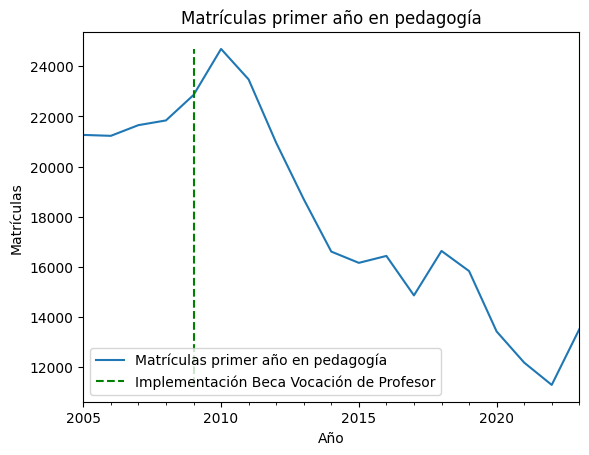

In [162]:
ano_beca = "2009-01-01"
total_matriculas_por_año_ped = calcular_matriculas_por_año(
    df[df["Carrera Genérica"] == "Pedagogía"], "Matrícula Primer Año"
)

total_matriculas_por_año_ped.plot(label="Matrículas primer año en pedagogía")
plt.vlines(
    x=ano_beca,
    ymin=total_matriculas_por_año_ped.min(),
    ymax=total_matriculas_por_año_ped.max(),
    color="green",
    linestyle="--",
    label="Implementación Beca Vocación de Profesor",
)
plt.title("Matrículas primer año en pedagogía")
plt.ylabel("Matrículas")
plt.xlabel("Año")
plt.legend()

Podemos ver que hay una clara aumento de matrículas de primer año en el año 2009, cuando se implementó la beca vocación de profesor. Por otro lado, esta disminuye drasticamente con el tiempo.

**TO DO**: *Decir en bonito que las preguntas de abajo es interesante para responder con DM*

- Se puede ver la fuga igual, si es que aumenta la mtrpicula en pedagogía, se puede identificar cuales carreras bajan matricula?
-  ver si aumentaron los puntajes en la matrícula de carreras de pedagogía
-  siguiendo esta línea, hay una columna que tiene el área de conocimiento, quizás se puede ver la distribución de género en distintas áreas y cómo ha ido cambiando en los años
-  hay una columna del año inicio actividad, que es el año en que se abrió la carrera (no tiene nulos), podría verse igual, ligado al área de conocimiento, qué tipo de carreras de abren más ahora (esperando que sea carreras más tecnológicas y de gestión) y que quizás las humanistas van quedando un poco más atrás

#### 4. Influencia programas de motivación para mujeres en STEM

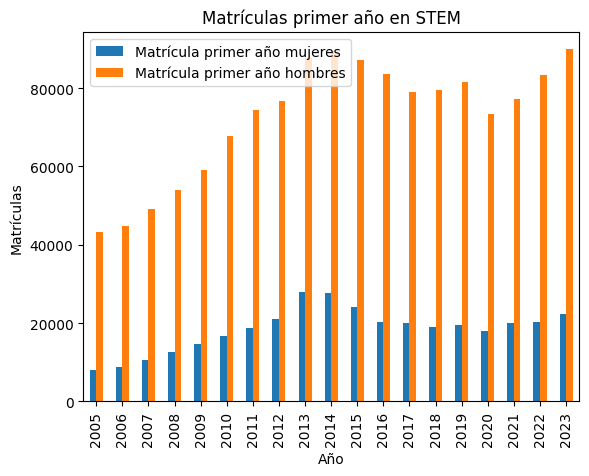

In [39]:
matriculas_stem = calcular_matriculas_por_año(
    df[df["Area Conocimiento"] == "Tecnología"],
    ["Matrícula primer año mujeres", "Matrícula primer año hombres"],
).copy()
matriculas_stem.index = matriculas_stem.index.year
matriculas_stem.plot(label="Matrículas primer año en STEM", kind="bar")

plt.xlabel("Año")
plt.ylabel("Matrículas")
plt.title("Matrículas primer año en STEM")
plt.legend()

**TO DO:** Explicar gran diferencia, decir q sería interesante saber por qué y ver si los programas de motivación para mujeres en STEM han tenido algún efecto en esto.